In [1]:
import pickle
import matplotlib.pyplot as plt
model = pickle.load(open("xgb_model.pkl", "rb"))
features = pickle.load(open("features.pkl", "rb"))
stats_origin = pickle.load(open("stats_origin.pkl", "rb"))
stats_dst = pickle.load(open("stats_dst.pkl", "rb"))

In [2]:
pickle.dump(features, open("features.pkl", "wb"))
pickle.dump(stats_origin, open("stats_origin.pkl", "wb"))
pickle.dump(stats_dst, open("stats_dst.pkl", "wb"))

In [3]:
origin_table = []
for k in ["ATL", "DEN", "LAX", "JFK", "LAS"]:
    v = stats_origin[k]
    curr = []
    curr.append(k)
    curr.append("{:.3f}".format(float(v["accuracy"])))
    curr.append("{:.3f}".format(float(v["precision"])))
    curr.append("{:.3f}".format(float(v["recall"])))
    curr.append("{:.3f}".format(float(v["f1-score"])))
    origin_table.append(curr)

col_names = ["Airport", "Accuracy", "Precision", "Recall", "F1 Score"]

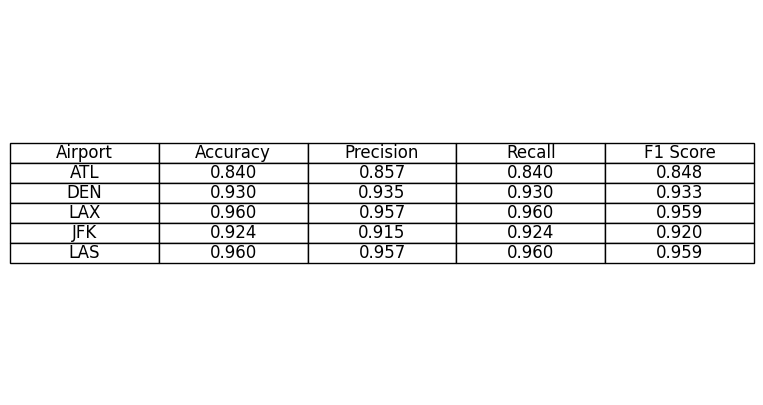

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))
table = ax.table(cellText=origin_table, cellLoc='center', colLabels=col_names, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Scale the table for better visualization

ax.axis('off')

plt.savefig('test.png', bbox_inches='tight', pad_inches=0.1)

In [5]:
origin_table = []
for k in ["ATL", "DEN", "LAX", "JFK", "LAS"]:
    v = stats_dst[k]
    curr = []
    curr.append(k)
    curr.append("{:.3f}".format(float(v["accuracy"])))
    curr.append("{:.3f}".format(float(v["precision"])))
    curr.append("{:.3f}".format(float(v["recall"])))
    curr.append("{:.3f}".format(float(v["f1-score"])))
    origin_table.append(curr)

col_names = ["Airport", "Accuracy", "Precision", "Recall", "F1 Score"]

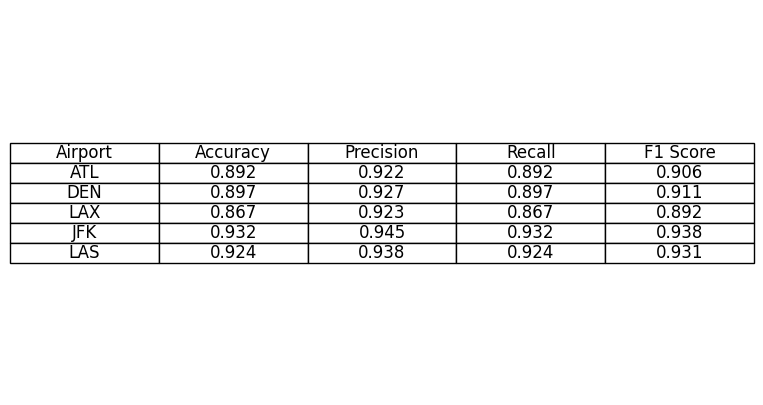

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
table = ax.table(cellText=origin_table, cellLoc='center', colLabels=col_names, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Scale the table for better visualization

ax.axis('off')

plt.savefig('test.png', bbox_inches='tight', pad_inches=0.1)

In [7]:
features

['origin_temperature',
 'destination_temperature',
 'origin_visibility',
 'destination_visibility',
 'origin_wind_direction',
 'destination_wind_direction',
 'origin_wind_speed',
 'destination_wind_speed',
 'distance',
 'scheduled_departure']

In [8]:
labels = [x.replace("_", " ").title() for x in features]

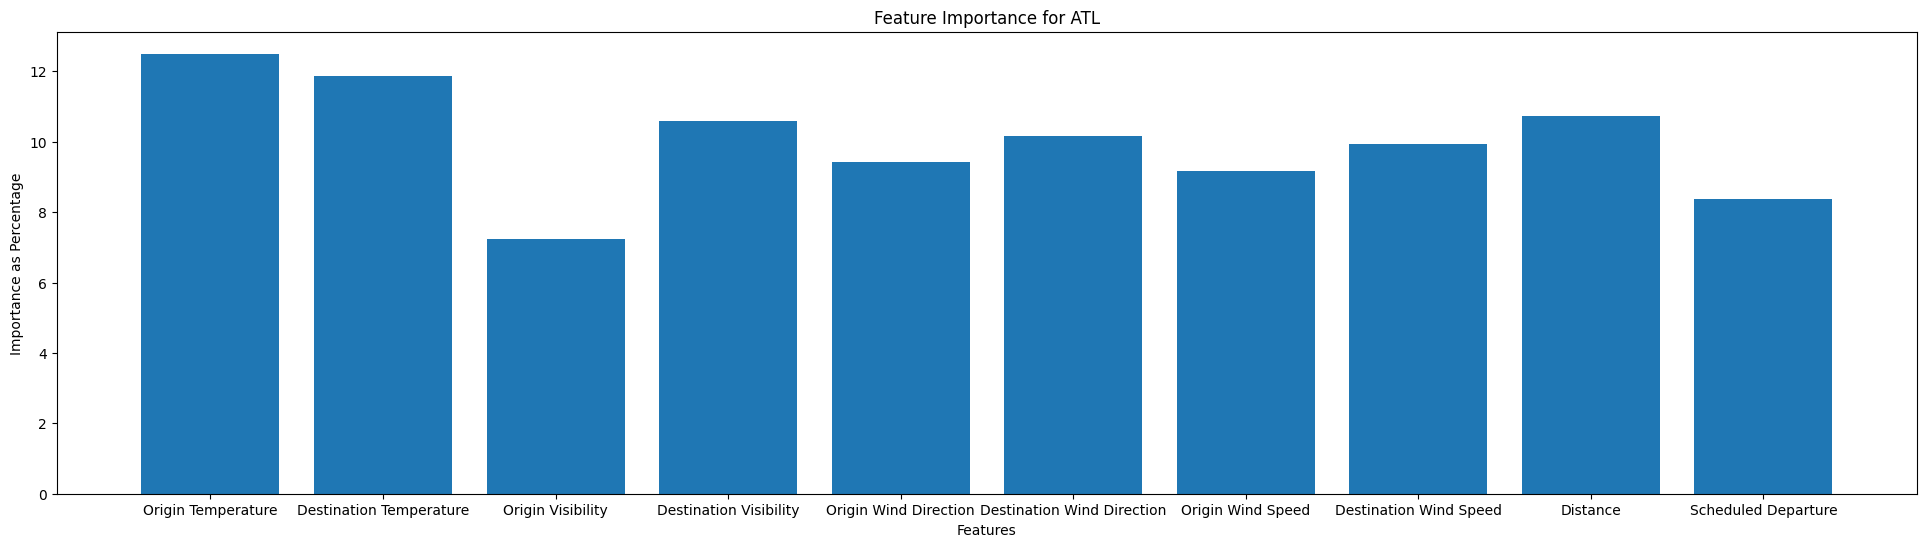

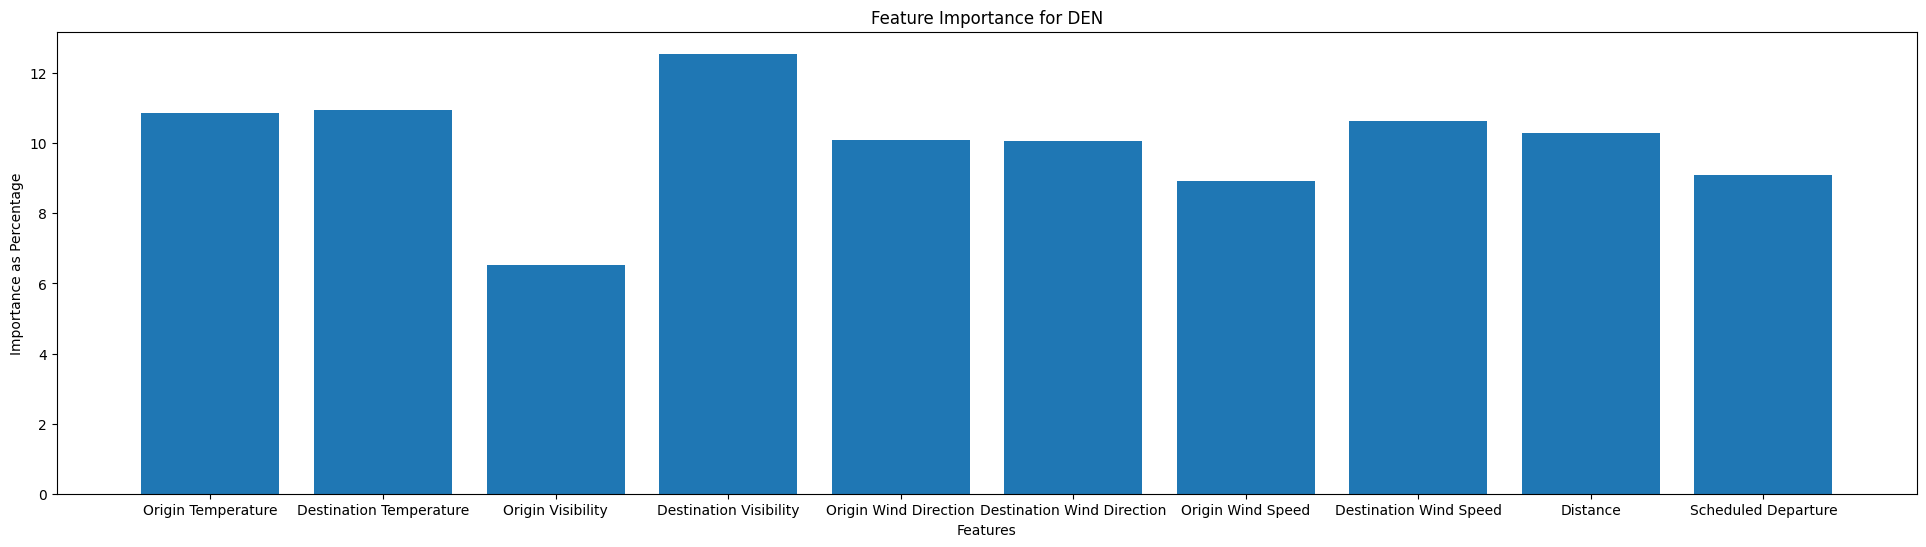

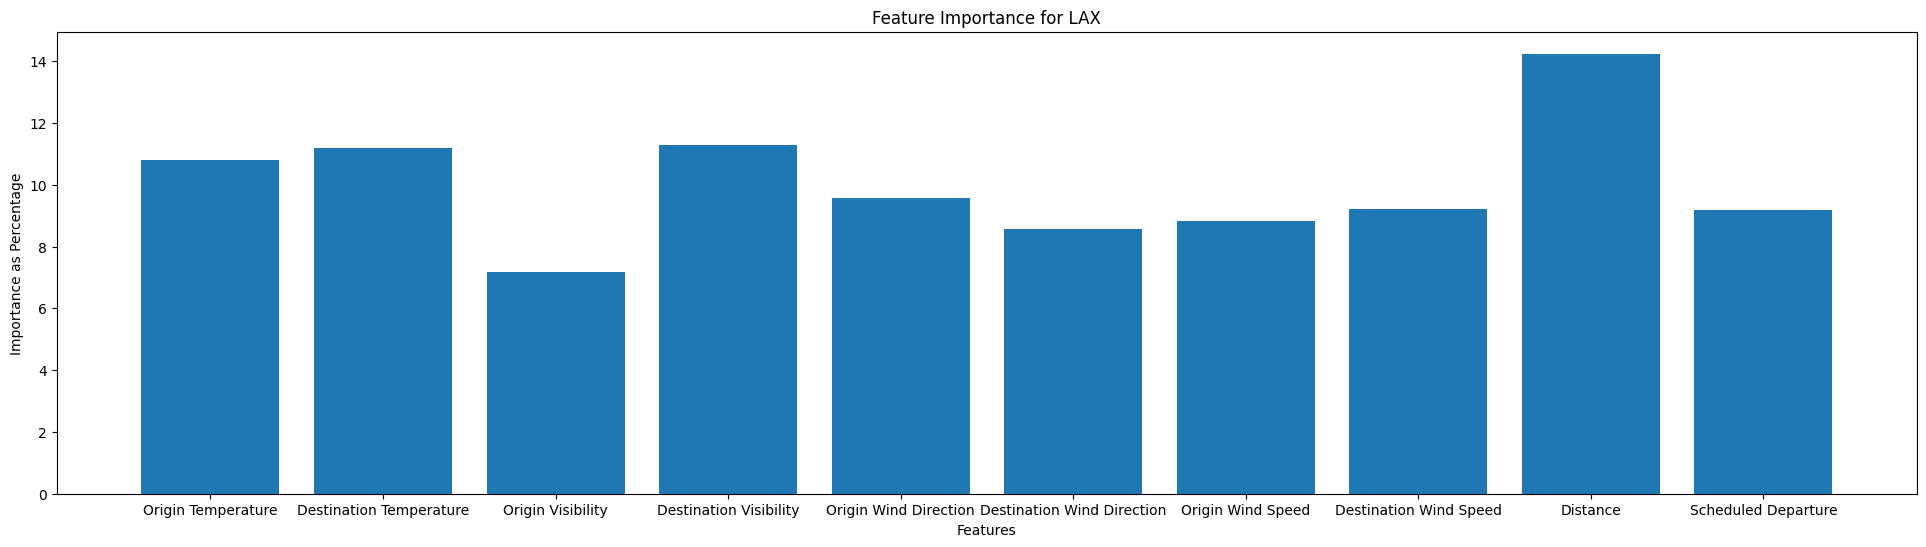

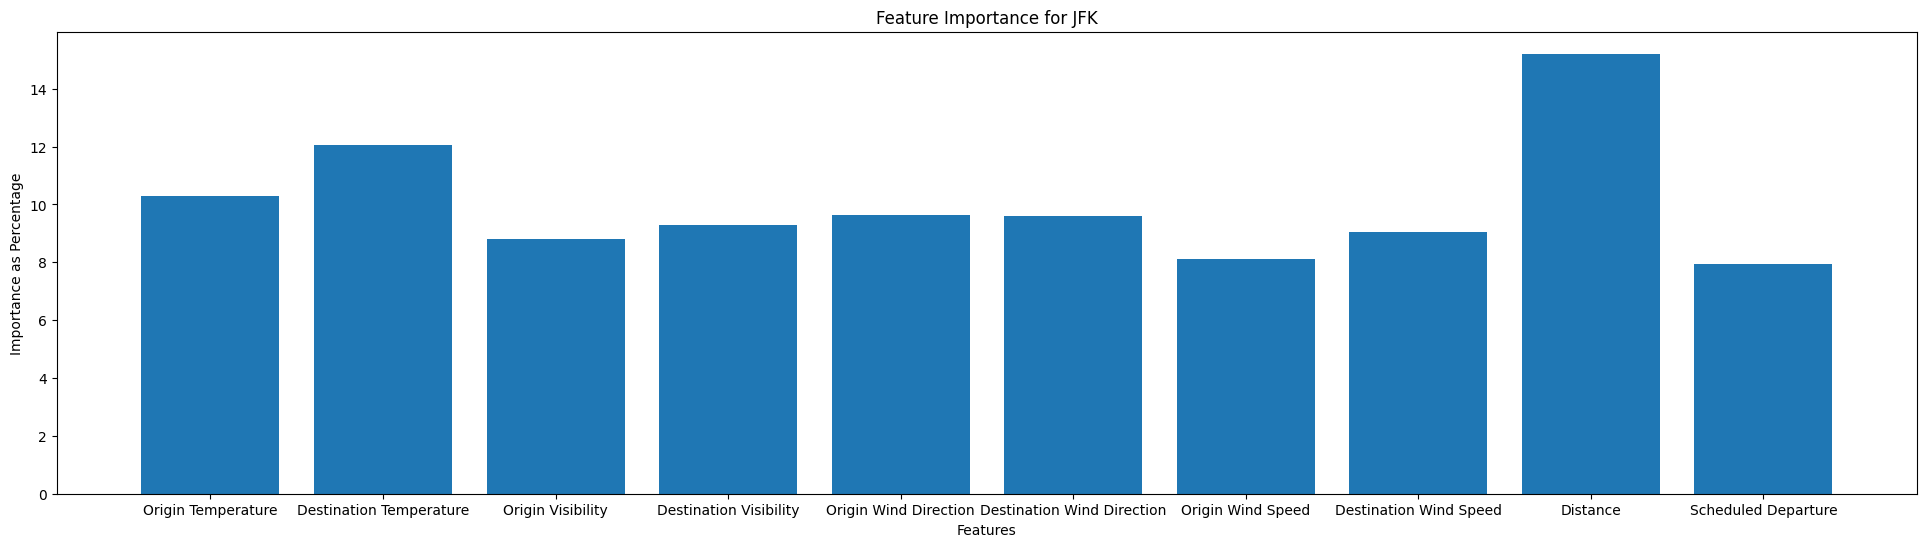

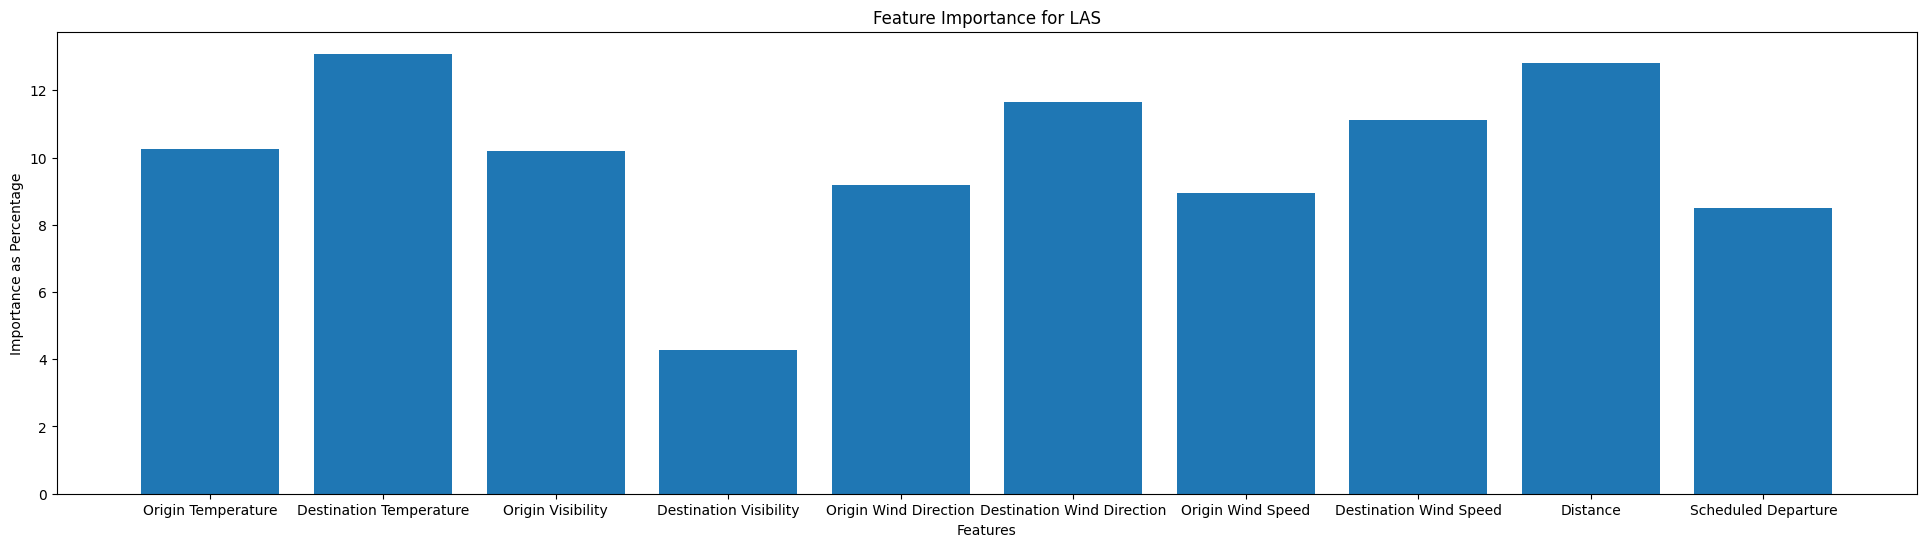

In [9]:
for k in ["ATL", "DEN", "LAX", "JFK", "LAS"]:
    vector = stats_dst[k]["feature_importance"] * 100
    plt.figure(figsize=(24, 6))
    plt.bar(labels, vector)
    plt.xlabel("Features")
    plt.ylabel("Importance as Percentage")
    plt.title(f"Feature Importance for {k}")
    plt.savefig(f'{k}.png', bbox_inches='tight', pad_inches=0.1)